![res.jpeg](res.jpeg)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"]=(10,6)                           # grafiklerde kullanılacak figure size
sns.set_style("whitegrid")                                      # seaborn grafiklerin arka plan ayarı 
pd.set_option("display.float_format", lambda x: '%.2f'  %x)     # folat değerleri virgülden sonra 2 rakam olarak göster

pd.options.display.max_rows=150                                 # görünecek max rows
pd.options.display.max_columns=100                              # görünecek max columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

## Read data from file

In [2]:
adult=pd.read_csv("adult_eda.csv")
df=pd.DataFrame.copy(adult)

In [3]:
# df = pd.read_csv("../eda/adult_eda.csv") 

# .csv dosyamız localimizde farklı bir klasor içerisindeyse okuyabilmek için klasor uzantısı yazılır 
# yada tam uzantı bilinmiyorsa klasör isminden önce .. konur

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.00,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.00,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.00,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.00,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [8]:
df["education-num"].value_counts(dropna=False)

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [9]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [11]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,27493,5,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [13]:
df.workclass.value_counts(dropna=False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df[df.workclass=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.00,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.00,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.00,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.00,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.00,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.00,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.00,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.00,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
# "?" yer alacağı column lar object dtype olacaktır. bu column lar dan hangilerinde var görmek için for döngüsü kullanıyoruz

object_columns = df.select_dtypes(include='object')    # object columns lardan oluşan object_columns DataFrame i oluşturduk

for col in object_columns:                             # object_columns DataFrame in her bir column u için  
    print(col)
    print("--"*10)
    print(df[col].value_counts(dropna=False))          # print(object_columns[col].value_counts(dropna=False))
    print("**"*10)

workclass
--------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
********************
education
--------------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
********************
marital-status
--------------------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           

In [16]:
df[df.isin(['?'])].any()           # hangi sütunlarda "?" var True/False sorguluyoruz

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [17]:
df[df.isin(['?'])].count()         # hangi sütunlarda "?" kaç adet var sorguluyoruz

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

"workclass", "occupation" ve "native-country" column larda "?" yer alıyor

In [18]:
df[df.workclass=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.00,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.00,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.00,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.00,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.00,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.00,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.00,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.00,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [19]:
df.workclass[df.workclass=="?"]

27       ?
61       ?
69       ?
77       ?
106      ?
        ..
32530    ?
32531    ?
32539    ?
32541    ?
32542    ?
Name: workclass, Length: 1836, dtype: object

In [20]:
df.workclass.replace("?", "Unknown", inplace=True)

# "?" yerine "Unknown" yazdırdık ve inplace=True ile df de kalıcı işlem olarak atadık

In [21]:
df.workclass.value_counts()

# value_counts() ile Unknown ları görmüş oluyoruz

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [22]:
df.replace("?", "Unknown", inplace=True)

# DataFrame içinde yer alan tüm "?" leri "Unknown" yapıyoruz ("occupation" ve "native-country" column ları için)
# DataFrame üzerinde inceleme yapmadan uygulamamak lazım. 
# value lar arasında "?" noktalama işareti olarak yer alan bir yer varsa onuda yapar pek tercih edilmez

In [23]:
df.occupation.value_counts()

# value_counts() ile Unknown ları görmüş oluyoruz

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df["native-country"].value_counts()

# value_counts() ile Unknown ları görmüş oluyoruz

United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [25]:
df[df.isin(['?'])].any()
# df[df=='?'].any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [26]:
df.education.value_counts(dropna=False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [27]:
df["education-num"].value_counts(dropna=False)

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [28]:
df.groupby("education")["education-num"].value_counts(dropna=False)

# "education" column da yer alan "10th" değeri için "education-num" column da karşılık olarak 916 yerde "6.00", 17 yerde "NaN" bulunuyor

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

"education" column da "NaN" değer bulunmuyor ve yer alan tüm değerler için "education-num" column da farklı bir float yada NaN değer yer alıyor. "education-num" column u silmek veri kaybına neden olmayacak. 

In [29]:
df.drop("education-num", axis=1, inplace=True)

# "education_num" column drop yapıldı

In [30]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

In [32]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [33]:
df.groupby("relationship", dropna=False)["marital-status"].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

* "relationship" column da yer alan Unmarried değerine; "marital-status" column da karşılık olarak 1601 yerde Divorced, 881 yerde Never-married, 451 yerde Separated, 383 yerde Widowed, 130 yerde ise Married-spouse-absent yer alıyor
* "relationship" column da yer alan Unmarried değerine; "marital-status" column da karşılık olarak yer alan değerler ile "relationship" column da yer alan Not-in-family, Other-relative ve NaN değerlerine "marital-status" column da karşılık olarak yer alan değerler benzer olduğundan; Not-in-family, Other-relative ve NaN değerleri Unmarried olarak değiştirelim

In [34]:
df.relationship.replace(["Not-in-family", "Other-relative", np.nan],"Unmarried", inplace=True)

# replace method ile ["Not-in-family", "Other-relative", np.nan] birden cok değeri "Unmarried" yapıyoruz. 
# birden cok değer için [] kullanıyoruz

# df.relationship.replace({np.nan:'Unmarried','Not-in-family':'Unmarried', 'Other-relattive':'Unmarried',inplace=True} 
# dictinary olarak her bir değerin karşılığını ayrı ayrı yazarak replace yapabiliriz. aynı anda bir cok değişkilik yapılabilir.

In [35]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [36]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [37]:
df.corr()

# korelasyon iki değerin birbirine bağımlılığını gösteriyor. -1 ile +1 arasında değer alabiliyor
# 0 dan +1 e yaklaştıkça bağımlılık durumu artar
# 0 dan -1 e yaklaştıkça negitf bağımlılık artar

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


maaş durumu da bizim için önemli fakat "salary" column u obcejt dtype olduğundan korelasyon tablosuna alınmıyor. <=50K : 0 ve >50K : 1 yaparak Salary_num adında yeni bir column oluşturarak ve korelasyona dahil edelim

In [38]:
df["Salary_num"] = df.salary.map({"<=50K" : 0, ">50K" : 1})  

# df["Salary_num"] = df.salary.replace({"<=50K" : 0, ">50K" : 1}) replace method ilede aynı şekilde yapılıyor

In [39]:
df.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [40]:
df["Salary_num"].value_counts()

# Salary_num column değerlerini görmüş oluyoruz

0    24720
1     7841
Name: Salary_num, dtype: int64

In [41]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,Salary_num
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
Salary_num,0.23,-0.01,0.22,0.15,0.23,1.00


Salary_num ın age ve hour-per-week arasında 0.23 lük bir bağlantı var

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00
Salary_num,32561.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


## age

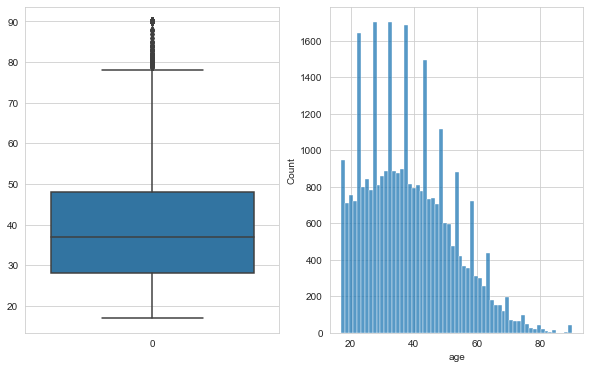

In [43]:
plt.figure(figsize=(10,6))     

plt.subplot(1, 2, 1)
sns.boxplot(data = df.age)

plt.subplot(1, 2, 2)
sns.histplot(data = df.age);

In [44]:
low = df.age.quantile(.25)
low

28.0

In [45]:
high = df.age.quantile(0.75)
high

48.0

In [46]:
Iqr = high - low
Iqr

20.0

In [47]:
upper_lim = high + 1.5*Iqr             # upper_lim 78 den büyük olan age değerler outliers
upper_lim

78.0

In [48]:
lower_lim = low - 1.5*Iqr             # lower_lim -2 den küçük olan age değerler outliers
lower_lim

-2.0

In [49]:
df[df.age>78].age.value_counts()      # age column da 78 den büyük olanları saydırdık. age değeri 90 olan 43 kişi var

# df[df["age"]>78]["age"].value_counts()

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

In [50]:
df[df["age"]>78].sort_values(by="age", ascending = False).head()

# df DataFrame i age değeri 78 den büyük olanlar için sıraladık. 
# ascending = False ile büyükten küçüğe sıraladı. default değer ascending =True

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
12451,90,Unknown,225063,Some-college,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,<=50K,0
10545,90,Private,175491,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,1
5406,90,Private,51744,Masters,Never-married,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,>50K,1
19747,90,Private,226968,7th-8th,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,0
28463,90,Federal-gov,195433,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K,0


## hours_per_week

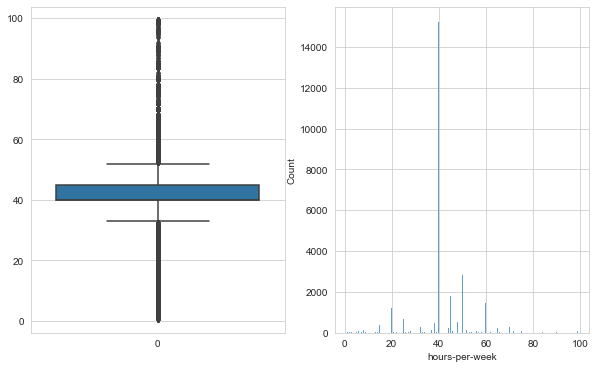

In [51]:
plt.figure(figsize=(10,6))    

plt.subplot(1, 2, 1)
sns.boxplot(data = df["hours-per-week"])

plt.subplot(1, 2, 2)
sns.histplot(data = df["hours-per-week"]);

In [52]:
low1 = df["hours-per-week"].quantile(.25)
low1

40.0

In [53]:
high1 = df["hours-per-week"].quantile(.75)
high1

45.0

In [54]:
Iqr1 = high1 - low1
Iqr1

5.0

In [55]:
upper_lim1 = high1 + 1.5*Iqr1
upper_lim1

52.5

In [56]:
lower_lim1 = low1 - 1.5*Iqr1
lower_lim1

32.5

hours-per-week değeri 52.5 ten büyük olanlar ve 32.5 ten küçük olan değerler outliers

In [57]:
df[df["hours-per-week"]>52.5].sort_values(by="hours-per-week", ascending = False)

# hours-per-week değerleri 52.5 ten büyük olanları hours-per-week değerine göre büyükten küçüğe sıraladık

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
25986,44,Local-gov,212665,Some-college,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K,0
23179,31,Private,511289,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,2907,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
9831,67,Private,35015,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23,Private,181820,HS-grad,Separated,Craft-repair,Unmarried,White,Male,0,0,53,United-States,<=50K,0
28858,62,Private,123411,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,53,United-States,<=50K,0
15889,43,Federal-gov,155106,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,53,United-States,<=50K,0
15908,22,Local-gov,163205,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,53,United-States,<=50K,0


In [58]:
df[df["hours-per-week"]>52.5]["hours-per-week"].count()   # hour-per-week değeri 52.5 ten büyük olan kişi sayısı

3492

In [59]:
df[df["hours-per-week"]<32.5].sort_values(by="hours-per-week", ascending = False)

# hours-per-week değerleri 32.5 ten küçük olanları hours-per-week değerine göre büyükten küçüğe sıraladık

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
6126,38,Private,110607,HS-grad,Divorced,Other-service,Unmarried,White,Male,0,0,32,United-States,<=50K,0
15812,38,Private,266325,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,32,United-States,>50K,1
7991,37,Private,118486,Bachelors,Separated,Prof-specialty,Unmarried,White,Female,4934,0,32,United-States,>50K,1
28784,49,Self-emp-not-inc,343742,10th,Never-married,Craft-repair,Unmarried,Black,Male,0,0,32,United-States,<=50K,0
10087,50,Private,92968,Bachelors,Never-married,Sales,Unmarried,White,Female,0,0,32,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22960,21,Private,184135,HS-grad,Never-married,Machine-op-inspct,Unmarried,Black,Male,0,0,1,United-States,<=50K,0
25078,74,Private,260669,10th,Divorced,Other-service,Unmarried,White,Female,0,0,1,United-States,<=50K,0
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1
5808,76,Unknown,211574,10th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,<=50K,0


In [60]:
df[df["hours-per-week"]<32.5]["hours-per-week"].count()   # hour-per-week değeri 32.5 ten küçük olan kişi sayısı

5516

In [61]:
df[(df["hours-per-week"]>52.5) | (df["hours-per-week"]<32.5)]["hours-per-week"].value_counts().sort_index(ascending = False)

# hours-per-week değerleri 52.5 ten büyük ve 32.5 ten küçük olanların değerlerini sayarak index değerlerine göre sıraladık
# hours-per-week degeri 99 olan 85,  1 olan 20 kişi var 

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
32     266
31       5
30    1149
29       7
28      86
27      30
26      30
25     674
24     252
23      21
22      44
21      24
20    1224
19      14
18      75
17      29
16     205
15     404
14      34
13      23
12     173
11      11
10     278
9       18
8      145
7       26
6       64
5       60
4       54
3       39
2       32
1       20
Name: hours-per-week, dtype: int64

In [62]:
df[(df["hours-per-week"]>52.5) | (df["hours-per-week"]<32.5)]["hours-per-week"].count()  

# hours-per-week column için 52.5 ten büyük ve 32.5 ten küçün outliers toplamı. outliers oranı yaklaşık %30

9008

In [63]:
df.shape

(32561, 15)

In [64]:
df[df["hours-per-week"]==99].sample(10)      

# hpur-per-week değeri 99 olan 10 örnek aldık

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
25806,49,Unknown,31478,7th-8th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,99,United-States,<=50K,0
13558,38,Private,191103,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K,1
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K,0
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K,1
32531,30,Unknown,33811,Bachelors,Never-married,Unknown,Unmarried,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,0
15016,62,Private,272209,HS-grad,Divorced,Priv-house-serv,Unmarried,Black,Female,0,0,99,United-States,<=50K,0
12788,24,State-gov,208826,Doctorate,Never-married,Prof-specialty,Unmarried,White,Female,0,0,99,England,<=50K,0
18881,43,Private,249771,HS-grad,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,99,United-States,<=50K,0
4308,35,Self-emp-not-inc,166416,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K,0
13580,38,Self-emp-not-inc,112158,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K,0


In [65]:
df[(df["hours-per-week"]==99) & (df["age"]>70)]

# hours-per-week değeri 99 olan ve sge değeri 70 ten büyük olanlar

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
16604,73,Self-emp-not-inc,102510,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,6418,0,99,United-States,>50K,1
19997,72,Private,268861,7th-8th,Widowed,Other-service,Unmarried,White,Female,0,0,99,Unknown,<=50K,0


In [66]:
df.groupby("workclass")["hours-per-week"].mean()

# "workclass" column a göre gruplandırıp "hours-per-week" column değerleri ortalamalarını yazdırdık
# "Federal-gov" olarak çalışanların "hours-per-week" değer ortalamaları 41.38

workclass
Federal-gov        41.38
Local-gov          40.98
Never-worked       28.43
Private            40.27
Self-emp-inc       48.82
Self-emp-not-inc   44.42
State-gov          39.03
Unknown            31.92
Without-pay        32.71
Name: hours-per-week, dtype: float64

In [67]:
df[df["hours-per-week"]==99].groupby("workclass")["hours-per-week"].count()

# hours-per-week değerleri 99 olanları workclass column a göre gruplandırdık ve hours-per-week değerlerine göre saydırdık
# hours-per-week değeri 99 olanlardan Fedaral-gov olarak çalışan 1 kişi var, Local-gov olarak çalışan 4 kişi var

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
Unknown              5
Name: hours-per-week, dtype: int64

## find outlier values which extends the upper limit in both age and hours-per-week columns

In [68]:
df[(df["age"] > 78) & (df["hours-per-week"] > 52.5)]

# age column değeri 78 den büyük olanlar ve hour-per-week değeri 52.5 ten büyük olanlar

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


## Boxplot and Histplot for all numeric features

### boxplot

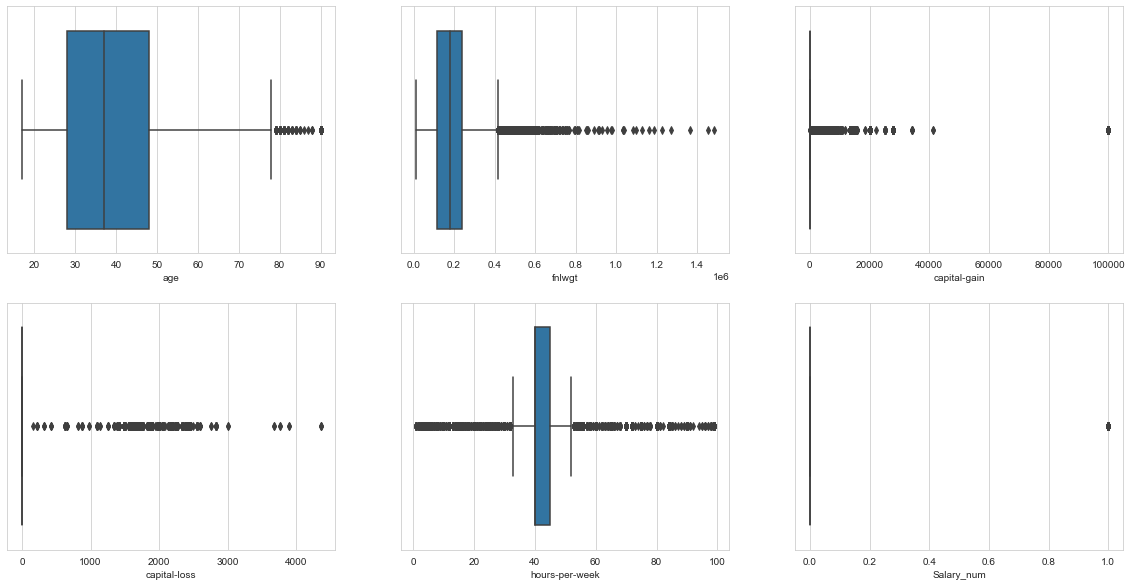

In [69]:
# ilk yöntem

index=0

plt.figure(figsize=(20,10))

for feature in df.select_dtypes("number").columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x= feature, data=df, whis=1.5);             # whis=IQR*1.5

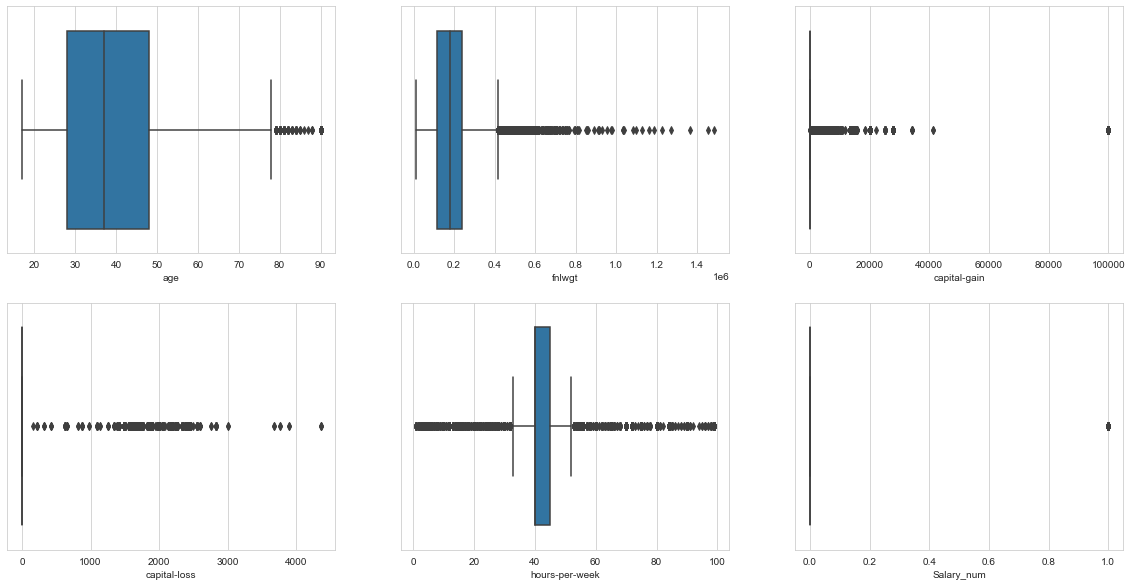

In [70]:
# ikinci yöntem 

number_columns = df.select_dtypes(include= "number")

index=0

plt.figure(figsize=(20,10))

for col in number_columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x=col, data= number_columns);

### histplot

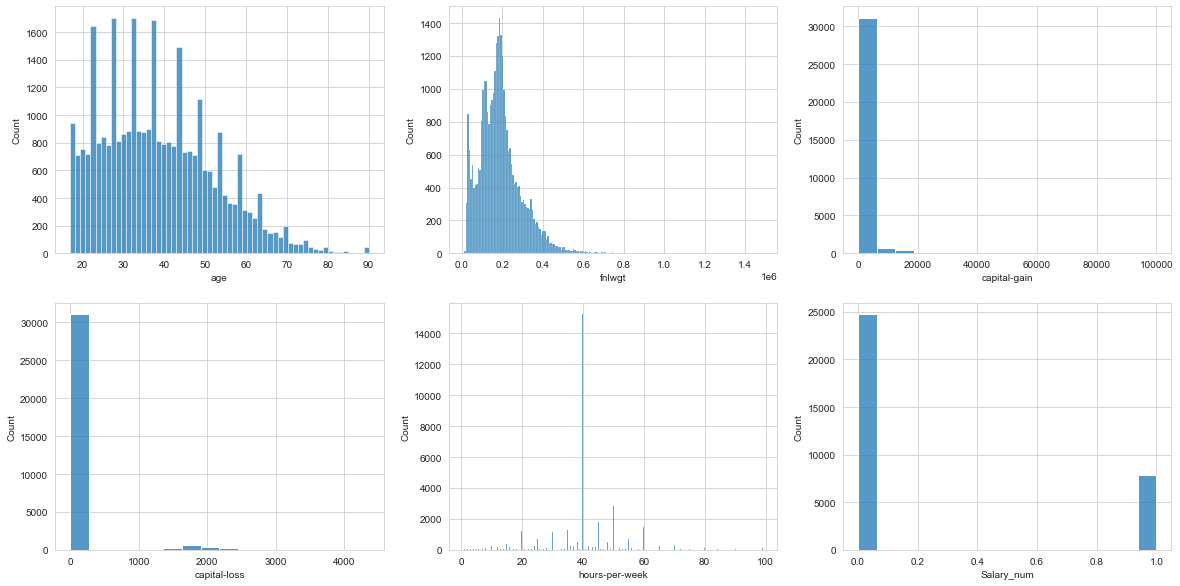

In [71]:
# ilk yöntem 

index=0

plt.figure(figsize=(20,10))

for feature in df.select_dtypes("number").columns:
    index+=1
    plt.subplot(2,3,index)
    sns.histplot(x= feature, data=df);

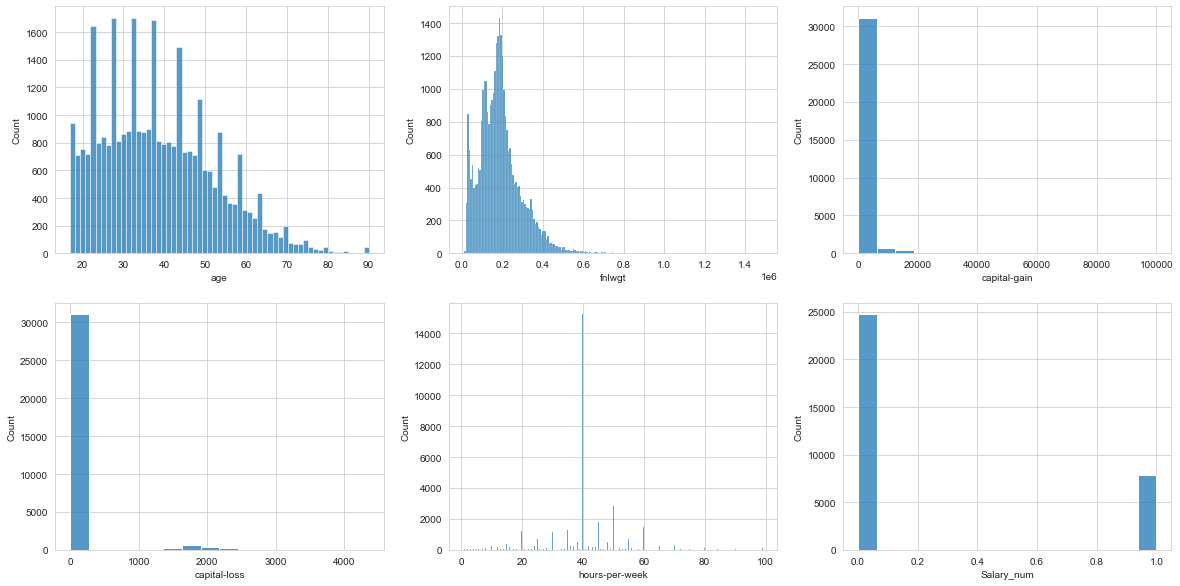

In [72]:
# ikinci yöntem 

number_columns = df.select_dtypes(include= "number")

index=0

plt.figure(figsize=(20,10))

for col in number_columns:
    index+=1
    plt.subplot(2,3,index)
    sns.histplot(x=col, data= number_columns);
    

### boxplot & histplot

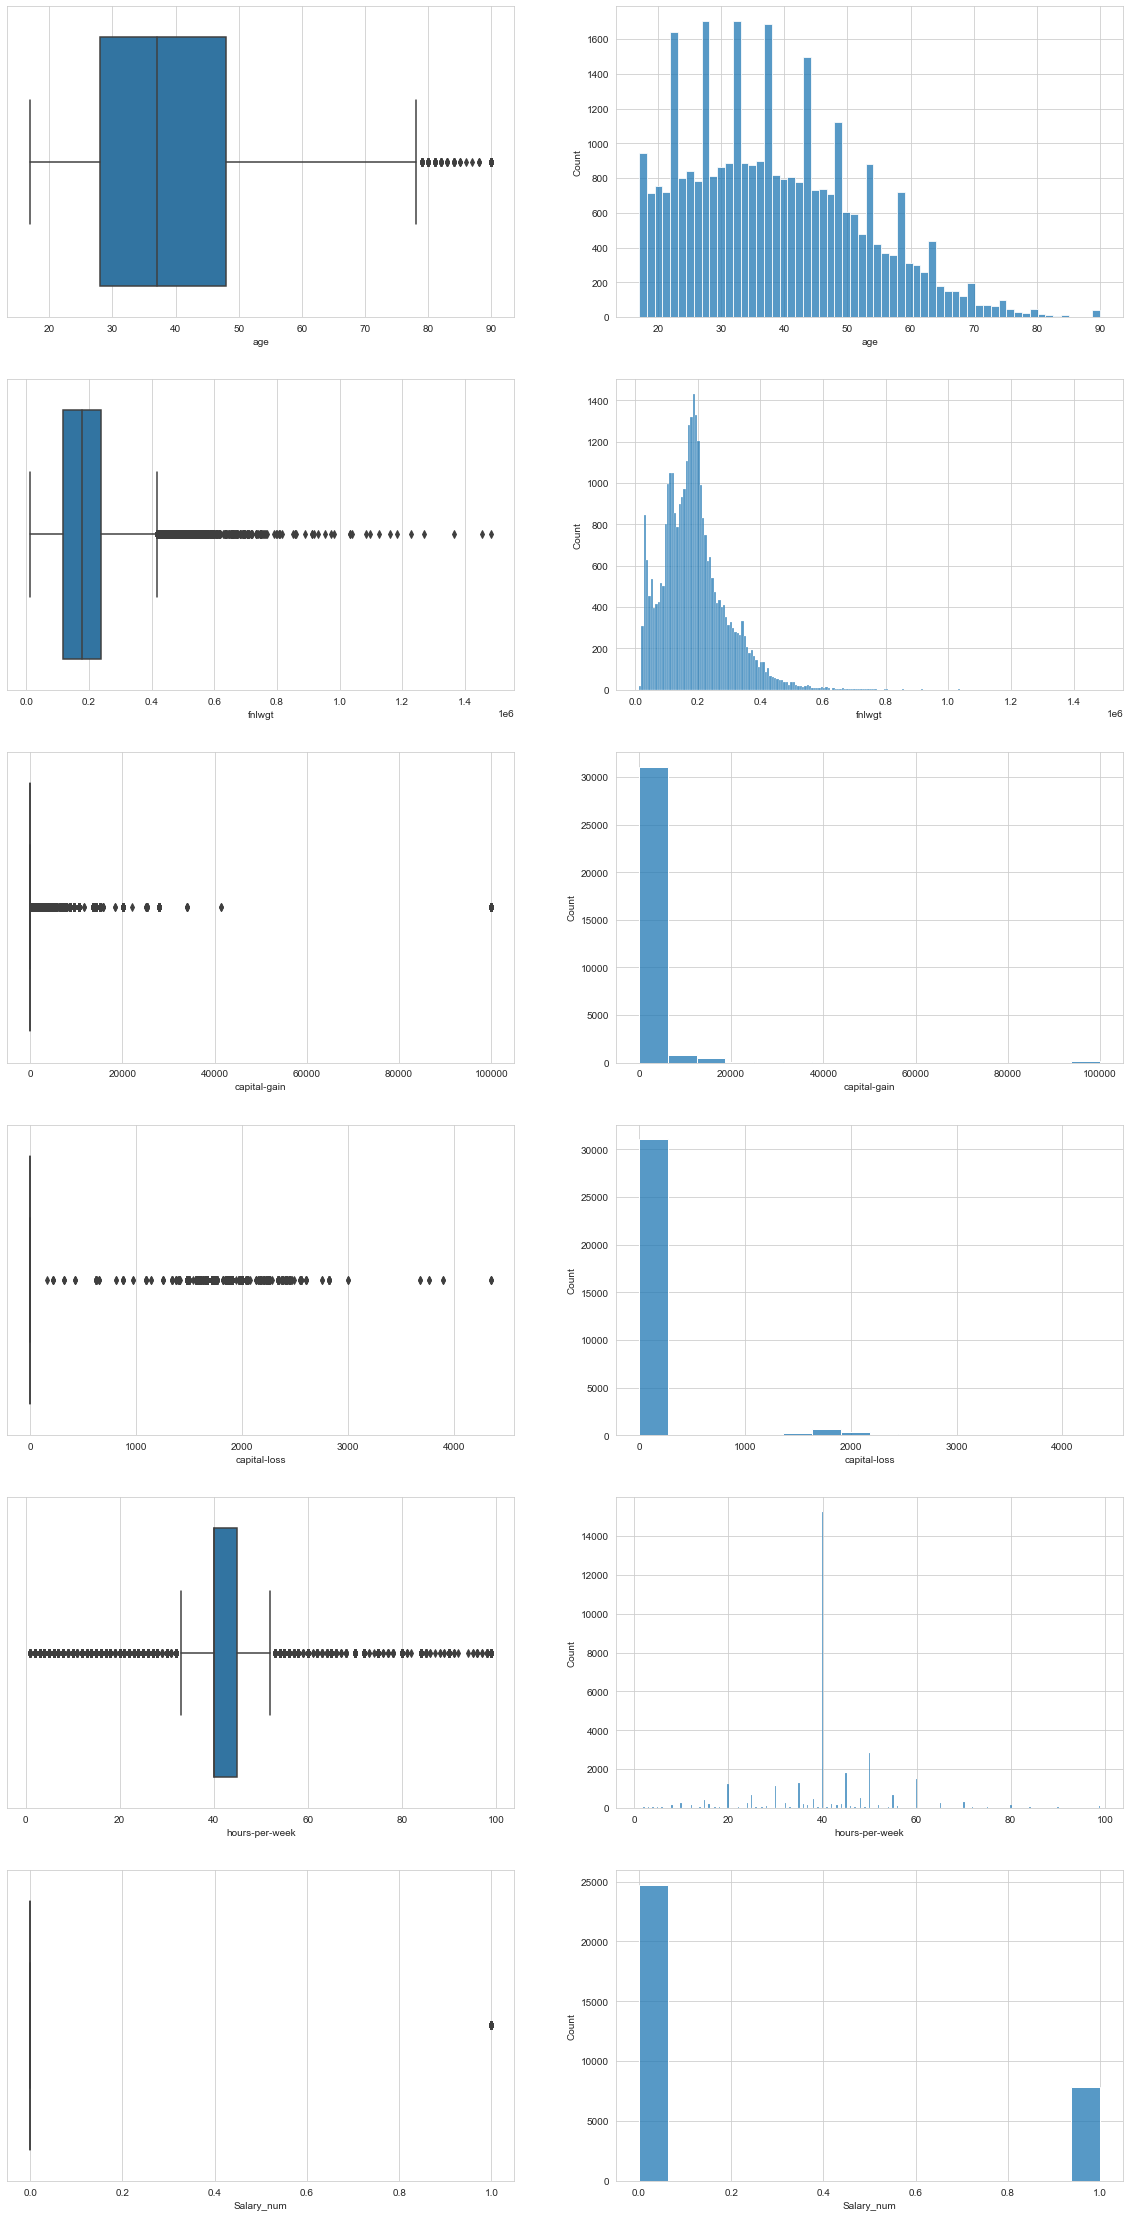

In [73]:
# ilk yöntem 

index=0

plt.figure(figsize=(20,40))

for feature in df.select_dtypes("number").columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x= feature, data=df)
    
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x= feature, data=df);

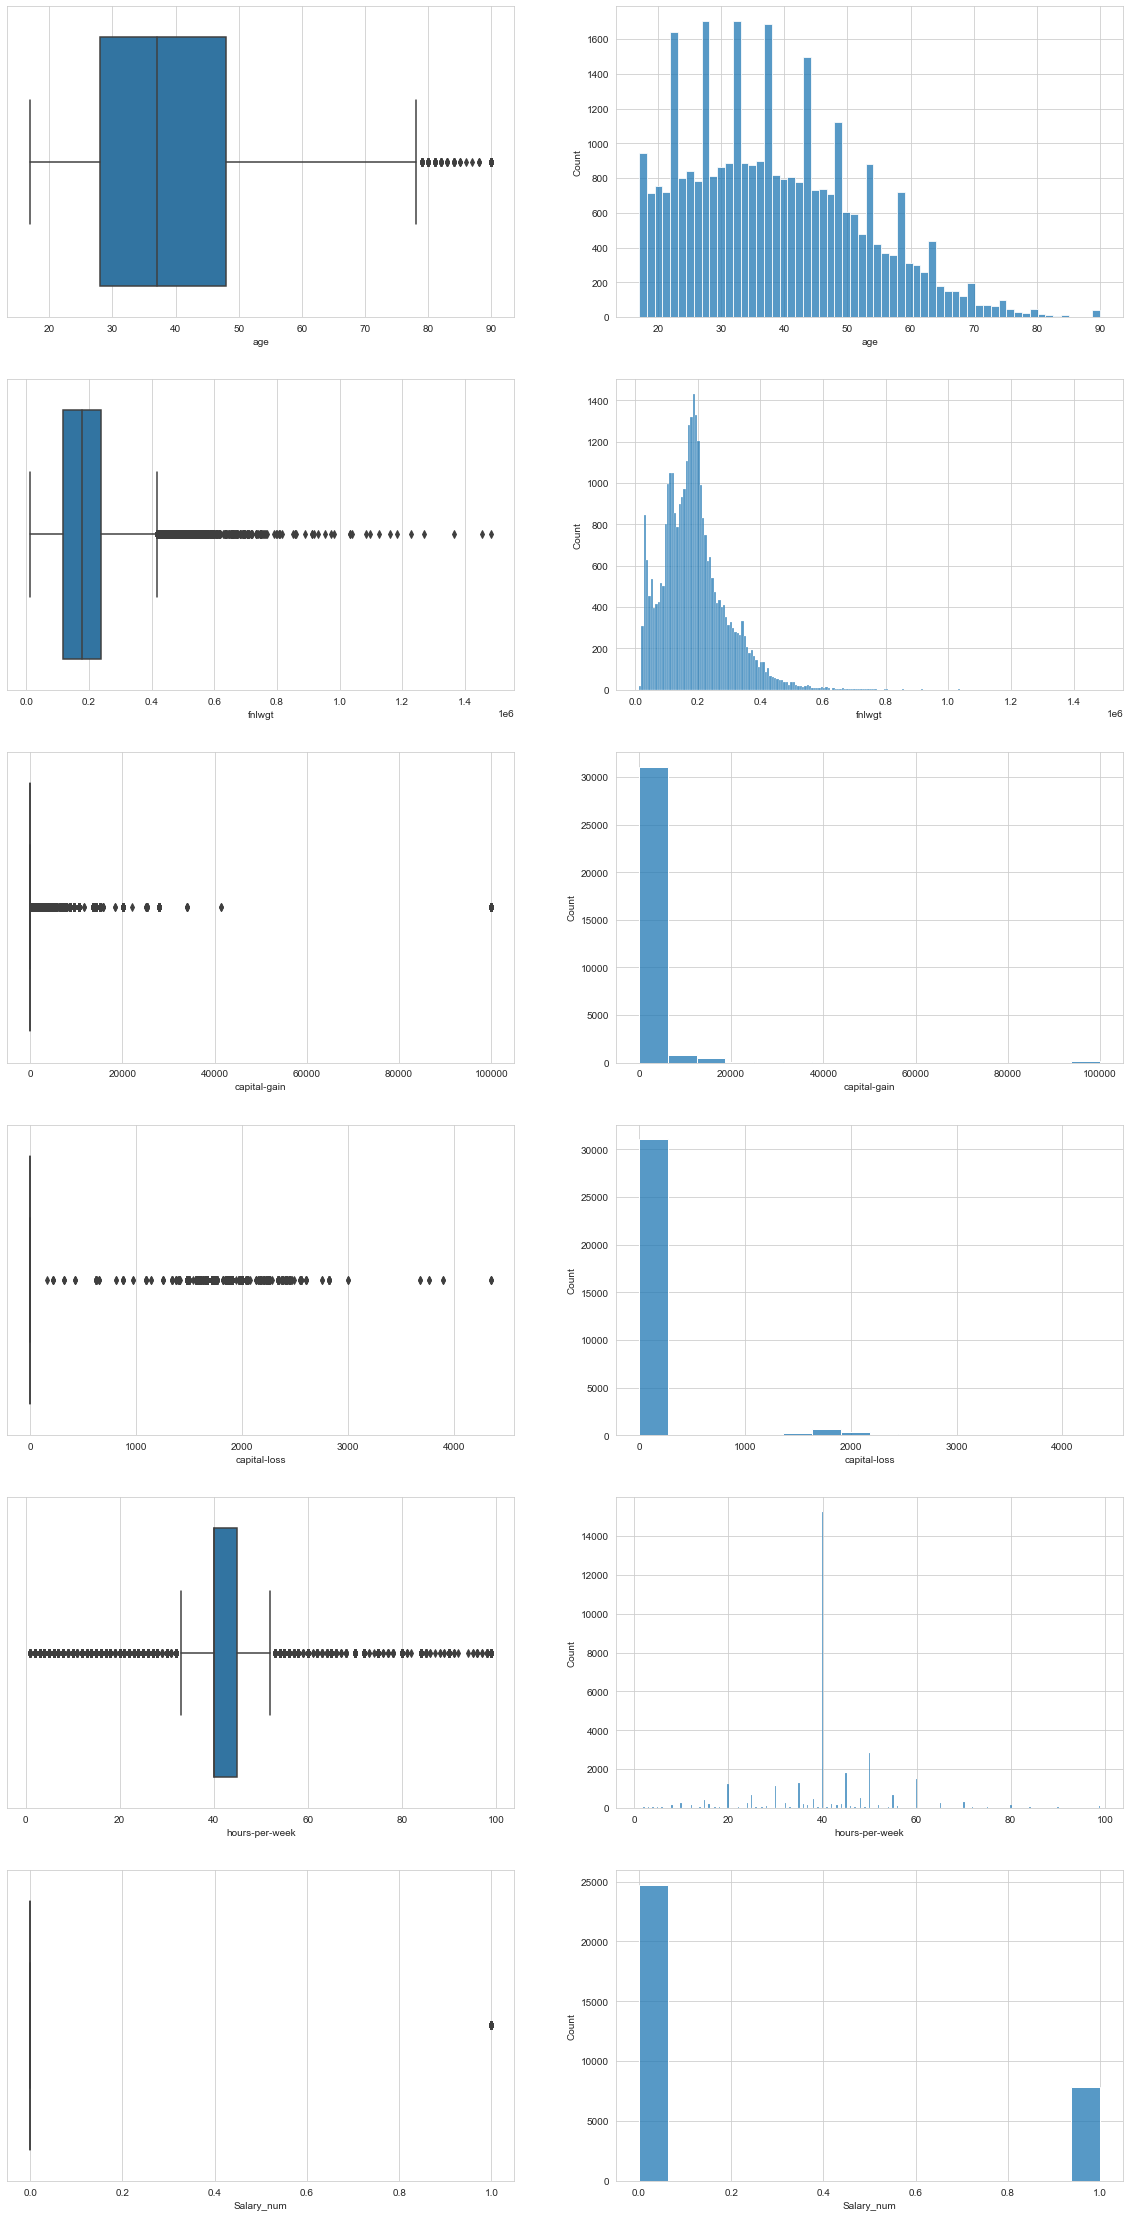

In [74]:
# ikinci yöntem 
number_columns = df.select_dtypes(include= "number")

index=0

plt.figure(figsize=(20,40))

for col in number_columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=col, data= number_columns)
    
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=col, data= number_columns);

## After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **
find outlier values which extends the upper limit in both age and hour-per-week columns

In [75]:
df[(df["age"]>78)&(df["hours-per-week"]>52.5)]

# "age" değeri 78 den büyük ve hours-per-week değeri 52.5 ten büyük olanlar

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,<=50K,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,<=50K,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,<=50K,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,<=50K,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K,1


In [76]:
drop_index=df[(df["age"]>78)&(df["hours-per-week"]>52.5)].index   # üst kod satırındakilerin index değerlerini atadık
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [77]:
df.drop(index=drop_index, inplace=True)

# "age" değeri 78 den büyük ve hours-per-week değeri 52.5 ten büyük olanlar drop edildi

In [78]:
df[(df["age"]>78)&(df["hours-per-week"]>52.5)]

# check outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num


---
## How many of each race are represented in this dataset?
---

In [79]:
race_count = df.race.value_counts()
race_count

White                 27807
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [80]:
race_count.sort_values()

Other                   271
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
White                 27807
Name: race, dtype: int64

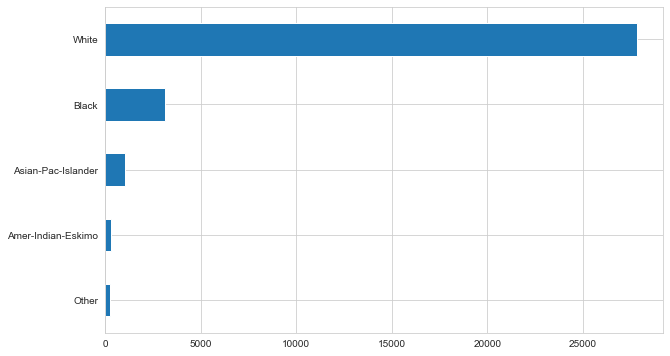

In [81]:
race_count.sort_values().plot.barh();

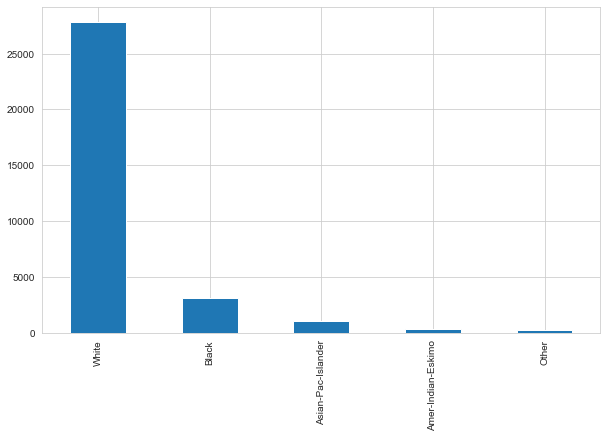

In [82]:
race_count.plot.bar();

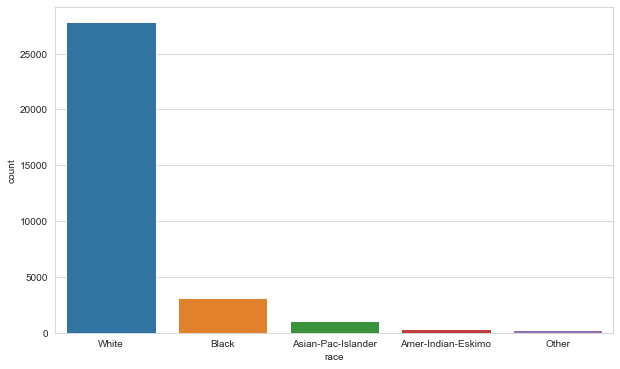

In [83]:
sns.countplot(df.race);

---
## What is the average age of men/women?
---

In [84]:
df[df.sex=="Female"]["age"].mean()

# df.loc[df['sex']=='Female','age'].mean()

36.85823043357163

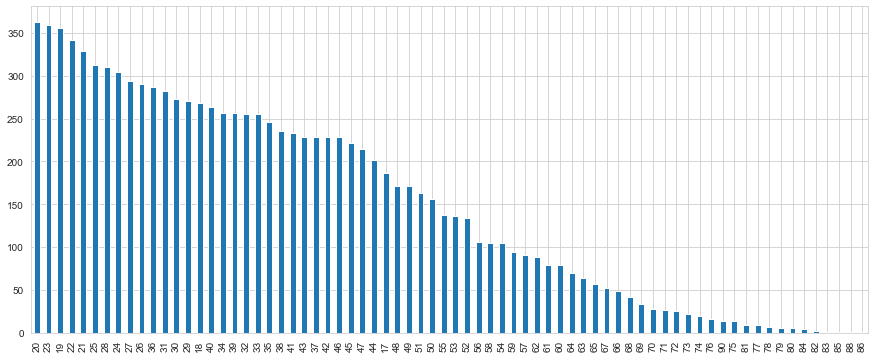

In [85]:
plt.figure(figsize=(15,6))
df[df.sex=="Female"]["age"].value_counts().plot.bar();

In [86]:
df[df.sex=="Male"]["age"].mean()

# df.loc[df['sex']=='Male','age'].mean()

39.41444378127726

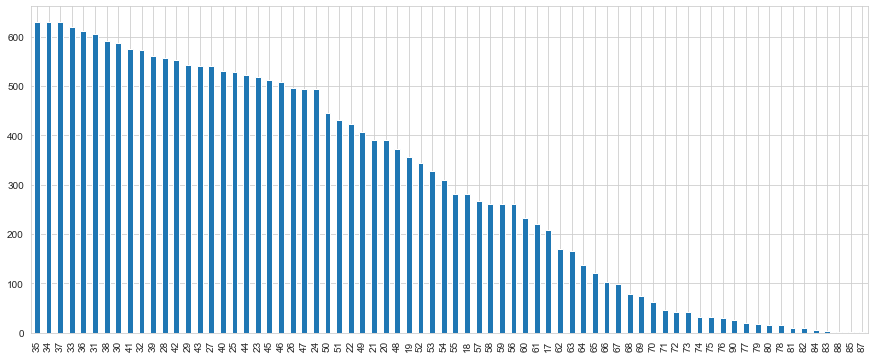

In [87]:
plt.figure(figsize=(15,6))
df[df.sex=="Male"]["age"].value_counts().plot.bar();

---
## What is the percentage of people who have a Bachelor's degree?
---

In [92]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [97]:
edu_count = df.education.count()     # len(df)
edu_count 

32552

In [99]:
bachelors_count = df[df.education=="Bachelors"]["education"].count()
bachelors_count

5353

In [101]:
pct_bachelors = (bachelors_count)/(edu_count)*100
pct_bachelors

16.44445809781273

---
## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [130]:
higher_edu_total= df[((df.education=="Bachelors") | (df.education=="Masters") | (df.education=="Doctorate")) & ((df["Salary_num"]==1) | (df["Salary_num"]==0))]
higher_edu_total

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K,0
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,0


In [131]:
len(higher_edu_total)

7486

In [114]:
adv_edu_plus = df[((df.education=="Bachelors") | (df.education=="Masters") | (df.education=="Doctorate")) & (df["Salary_num"]==1)]
adv_edu_plus

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,>50K,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,1
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K,1


In [115]:
len(adv_edu_plus)

3484

In [132]:
pct_high_edu= len(adv_edu_plus)/len(advanced_edu_total)*100
pct_high_edu

46.54020838899279

## What percentage of people without advanced education make more than 50K?

In [128]:
lower_edu_total = df[~df.education.isin(["Bachelors","Masters","Doctorate"])]
lower_edu_total                        

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K,0


In [127]:
lower_edu = df[(~df.education.isin(["Bachelors","Masters","Doctorate"])) & (df.salary==">50K")] 
lower_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K,1
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K,1
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,1
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1


In [129]:
pct_low_edu = len(lower_edu)/len(lower_edu_total)*100
pct_low_edu

17.370142822947418

In [133]:
if pct_high_edu > pct_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

More education more money!


## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [149]:
hpw_min_plus = df[(df["hours-per-week"]==df["hours-per-week"].min())&(df["Salary_num"]==1)]
hpw_min_plus

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K,1


In [151]:
len(hpw_min_plus)


2

In [145]:
hpw_min = df[df["hours-per-week"]==df["hours-per-week"].min()]
hpw_min

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Salary_num
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K,1
1036,66,Self-emp-inc,150726,9th,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,Unknown,<=50K,0
1262,69,Unknown,195779,Assoc-voc,Widowed,Unknown,Unmarried,White,Female,0,0,1,United-States,<=50K,0
5590,78,Unknown,363134,HS-grad,Widowed,Unknown,Unmarried,White,Female,0,0,1,United-States,<=50K,0
5632,45,Unknown,189564,Masters,Married-civ-spouse,Unknown,Wife,White,Female,0,0,1,United-States,<=50K,0
5766,62,Unknown,97231,Some-college,Married-civ-spouse,Unknown,Wife,White,Female,0,0,1,United-States,<=50K,0
5808,76,Unknown,211574,10th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,<=50K,0
8447,67,Unknown,244122,Assoc-voc,Widowed,Unknown,Unmarried,White,Female,0,0,1,United-States,<=50K,0
9147,75,Unknown,260543,10th,Widowed,Unknown,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,<=50K,0
11451,27,Private,147951,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,<=50K,0


In [146]:
len(hpw_min)

20

In [153]:
pct_hpw_min_plus = len(hpw_min_plus) / len(hpw_min)*100
pct_hpw_min_plus

10.0

 ## What country has the highest percentage of people that earn >50K

In [154]:
country_salary_df = df.groupby('native-country')[['salary']].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [155]:
country_salary_df_riches = df[df.salary=='>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [158]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary',ascending=True)
rich_per_country

,salary
native-country,
Dominican-Republic,0.03
Columbia,0.03
Guatemala,0.05
Mexico,0.05
Nicaragua,0.06
Peru,0.06
Vietnam,0.07
Honduras,0.08
El-Salvador,0.08


In [159]:
rich_per_country[rich_per_country.salary==rich_per_country.salary.max()]

,salary
native-country,
Iran,0.42


In [160]:
#use iloc here
rich_per_country.sort_values('salary',ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.42


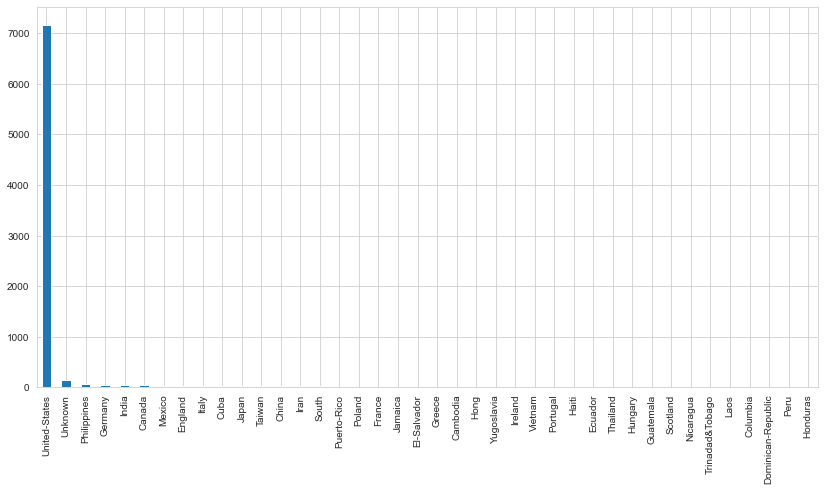

In [161]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");